![Kickstarter](misc/kickstarter_logo.png)

# Results of the Analysis of Kickstarter Projects
#### Data taken from Kaggle (https://www.kaggle.com/kemical/kickstarter-projects)

---
### Table of Contents:
* [1.)](#introduction) About Kickstarter and its Projects
* [2.)](#content_of_nb) Goal of this Notebook (Questions to be answered)
* [x.)](#main_categories_analysis) Analysis of the Main Categories
* [x.)](#price_analysis) Analysis of the Project Sizes (regarding the Prices)
* [x.)](#runtime_analysis) Analysis of the Project Runtimes
* [5.)](#combined_analysis) Combined Analysis of the first three questions
* [6.)](#result) Results



---
<a id='introduction'></a>
## 1.) About Kickstarter and its Projects


TODO

---
<a id='content_of_nb'></a>
## 2.) Goal of this Notebook (Questions to be answered)

TODO

#### Data

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from collections import defaultdict

filename = 'data/ks-projects-201801.csv'
df = pd.read_csv(filename)

#### Original Format

In [2]:
df.head(3)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00


A quick look at the data shows that...
- there are some columns which aren't necessary for the questions of this notebook and therefore can be dropped
- some of the columns need to be converted to take full advantage of them (e.g. column 'launched')
- there are interesting combinations of columns which could offer some more information (e.g. the runtime of a project)

In [3]:
# remove columns which aren't used during analysis
df.drop(['usd pledged', 'usd_pledged_real', 'usd_goal_real'], axis=1, inplace=True)

# convert launched and deadline columns
from datetime import datetime
df['launched'] = df['launched'].apply(lambda x: datetime.strptime(x[:10], "%Y-%m-%d"))
df['deadline'] = df['deadline'].apply(lambda x: datetime.strptime(x, "%Y-%m-%d"))
df['year_deadline'] = df['deadline'].apply(lambda x: x.year)

# calculate the runtime of the project
df['project_runtime'] = df['deadline'] - df['launched']
df['project_runtime'] = df['project_runtime'].apply(lambda x: int(x.days)) # project runtime in days

#### Format after Conversion

In [4]:
df.head(3)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,year_deadline,project_runtime
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11,0.0,failed,0,GB,2015,59
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02,2421.0,failed,15,US,2017,60
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12,220.0,failed,3,US,2013,45


---
<a id='main_categories_analysis'></a>
## x.) Analysis of the Main Categories

In [5]:
type(df)

pandas.core.frame.DataFrame

In [6]:
def textplot(df, xcol, ycol, xlabel='_', ylabel='_', title='_', use_overall_stats=True, figsize_inches=(15, 12)):
    '''
    TODO
    '''
    
    # Inputhandling
    assert str(type(df)) == "<class 'pandas.core.frame.DataFrame'>", "Input df is not a pandas DataFrame."
    assert xcol in df.columns and ycol in df.columns, "Input columns (xcol and/or ycol) not in given DataFrame."
    assert len(figsize_inches) == 2, "Figsize needs to have a x-value and a y-value. Please enter a tuple."
    
    #Default values
    if xlabel == '_':
        xlabel = xcol
    if ylabel == '_':
        ylabel = 'Ratios'
    if title == '_':
        title = 'Ratio of ' + ycol + ' in ' + xcol
    
    # Create a Dictionary which holds count_values like this: 
    # ycol = Categories
    # xcol = States
    # Dictionary[Category][State] -> 12398
    group_ycol_to_xcol = df.groupby([ycol])[xcol].value_counts(normalize=True)
    ycol_xcol_dict = defaultdict(dict)
    for idx, value in enumerate(group_ycol_to_xcol):
        ycol_val, xcol_val = group_ycol_to_xcol.index[idx]
        ycol_xcol_dict[ycol_val][xcol_val] = value
        
    # Prepare values for plotting
    X = []
    Y = []
    annotations = []
    for ycol_val, xcol_value_dict in ycol_xcol_dict.items():
        for xcol_val, value in xcol_value_dict.items():
            X.append(xcol_val)
            Y.append(value)
            annotations.append(ycol_val)

    # Build plot
    fig, ax = plt.subplots()
    fig.set_size_inches(figsize_inches)
    ax.scatter(x=X, y=Y, s=0.01) # data point is too small to see (-> show only text)
    for idx, txt in enumerate(annotations):
        ax.annotate(txt, (X[idx], Y[idx])) # places the text annotation at the data point
    if use_overall_stats:
        overall_stats = df[xcol].value_counts(normalize=True)
        ax.scatter(x=list(overall_stats.index), y=list(overall_stats.values), s=100, c='r') # overall states ratio
        plt.legend(["red dots = overall Ratios (not grouped by category)"])
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.title(title)
    plt.show()

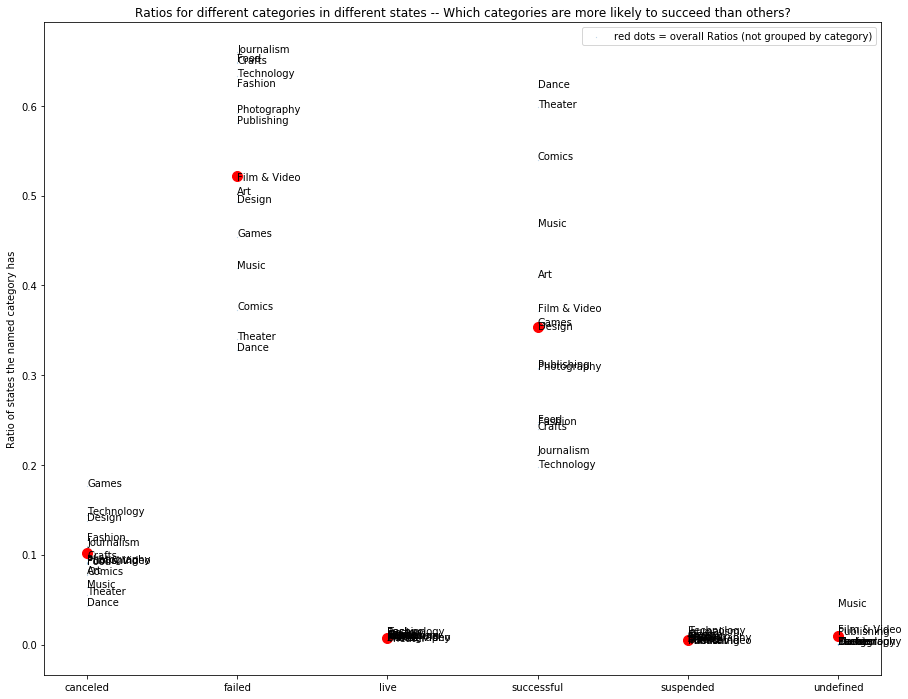

In [7]:
xlabel = ""
ylabel = "Ratio of states the named category has"
title = "Ratios for different categories in different states -- Which categories are more likely to succeed than others?"
textplot(df, 'state', 'main_category', xlabel=xlabel, ylabel=ylabel, title=title)

TODO: Conclusion

In [8]:
successful_cats = ['Dance', 'Theater', 'Comics', 'Music', 'Art']
failed_cats = ['Journalism', 'Food', 'Crafts', 'Technology', 'Fashion', 'Photography', 'Publishing']
canceled_cats = ['Games', 'Technology', 'Design', 'Fashion', 'Journalism']
unsuccessful_cats = list(set().union(failed_cats, canceled_cats)) # merges failed and canceled cats

---
<a id='price_analysis'></a>
## x.) Analysis of the Project Sizes (regarding the Prices)

---
<a id='runtime_analysis'></a>
## x.) Analysis of the Project Runtimes

In [9]:
def plot_changes_throughout_years(df, ycol, div_by, xlabel='_', ylabel='_', title='_', yearcol='year_deadline', colordict=None, figsize_inches=(15, 12)):
    '''
    TODO
    '''
    # Input Handling
    assert str(type(df)) == "<class 'pandas.core.frame.DataFrame'>", "Input df is not a pandas DataFrame."
    assert ycol in df.columns and div_by in df.columns, "Input columns (ycol and/or div_by) not in given DataFrame."
    if colordict is not None:
            assert str(type(colordict)) == "<class 'dict'>", "colordict is not a Dictionary"
    assert len(figsize_inches) == 2, "Figsize needs to have a x-value and a y-value. Please enter a tuple."
    
    # Default Values
    if xlabel == '_':
        xlabel = 'Year'
    if ylabel == '_':
        ylabel = 'Average ' + ycol
    if title == '_':
        title = 'Changeing ' + ycol + ' over the Years (divided by ' + div_by + ')'
    
    # Calculate the mean ycol Value for each year divided be the div_by col
    tmp = df.groupby([yearcol, div_by])[ycol].mean()

    # Prepare the values for plotting
    states = []
    years = defaultdict(list)
    avg_ycol_vals = defaultdict(list)
    for idx, value in enumerate(tmp):
        year, state = tmp.index[idx]
        states.append(state)
        years[state].append(year)
        avg_ycol_vals[state].append(value)

    # Build the Plot
    fig, ax = plt.subplots()
    fig.set_size_inches(figsize_inches)
    for state in set(states):
        if colordict is not None:
            ax.plot(years[state], avg_ycol_vals[state], c=colordict[state], label=state)
        else:
            ax.plot(years[state], avg_ycol_vals[state], label=state)
    plt.legend()
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.show()

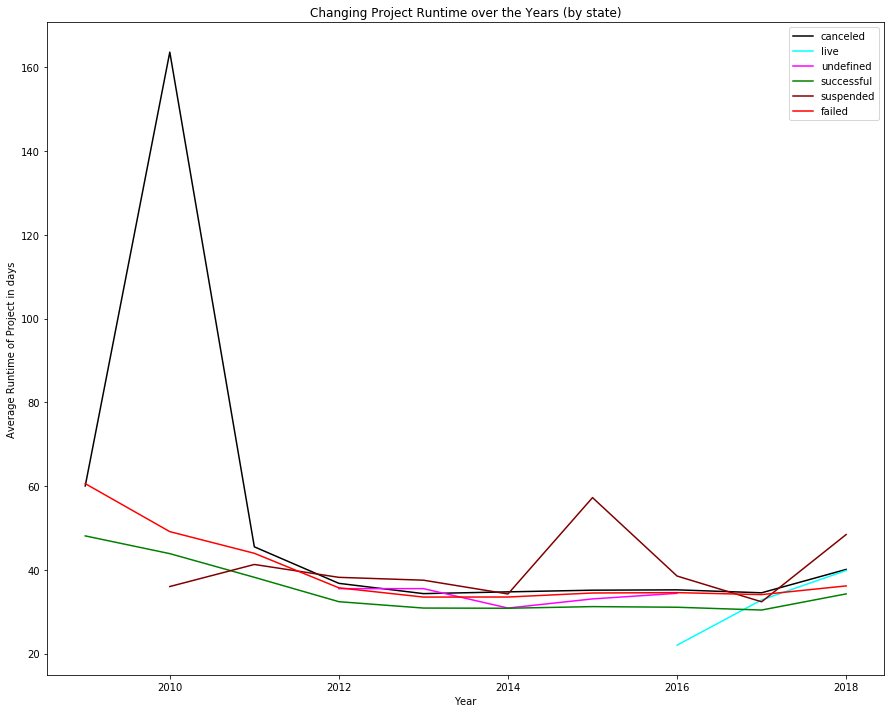

In [10]:
title = "Changing Project Runtime over the Years (by state)"
ylabel = "Average Runtime of Project in days"
xlabel = "Year"
colors = {
    'canceled': 'black',
    'failed': 'red',
    'live': 'cyan',
    'successful': 'green',
    'suspended': 'maroon',
    'undefined': 'magenta'
}
plot_changes_throughout_years(df, 'project_runtime', 'state', xlabel=xlabel, ylabel=ylabel, title=title, colordict=colors)

---
<a id='combined_analysis'></a>
## 5.) Combined Analysis of the first three questions

---
<a id='result'></a>
## 6.) Results

TODO